<a href="https://colab.research.google.com/github/nhutd107/AI_CDT_20146509_-D.Nhu-/blob/main/Fuzzy_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b525e7a72f59dff4fc34853a5537cf5d046218d600769be40cc2b8153459ffc2
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arrange(50,81,1)
slow = fuzzy.trimf(x,[50,50,60])




ModuleNotFoundError: ignored

KeyError: ignored

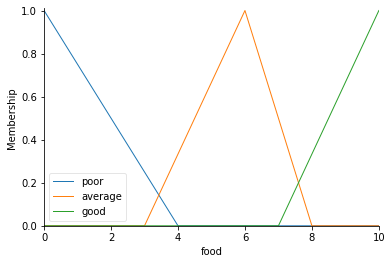

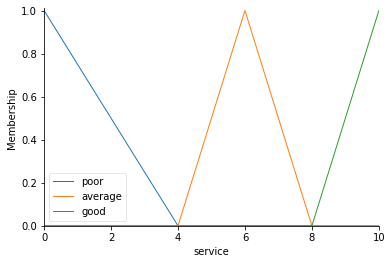

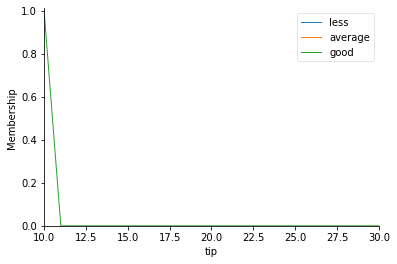

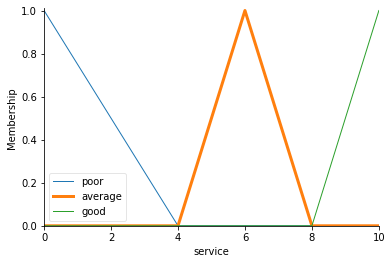

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl


food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,4])
food['average']= fuzz.trimf(food.universe,[3,6,8])
food['good']= fuzz.trimf(food.universe,[7,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,4])
service['average']= fuzz.trimf(service.universe,[4,6,8])
service['good']= fuzz.trimf(service.universe,[8,10,10])


tip['less']= fuzz.trimf(tip.universe,[0,0,4])
tip['average']= fuzz.trimf(tip.universe,[4,6,8])
tip['good']= fuzz.trimf(tip.universe,[8,10,10])

#hienr thị
food.view()
service.view()
tip.view()
service['average'].view()

#luật
rule1 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['good']& service['average'],tip['less'])
rule3 = ctrl.Rule(food['good']& service['good'],tip['less'])
rule4 = ctrl.Rule(food['average']& service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']& service['average'],tip['less'])
rule6 = ctrl.Rule(food['average']& service['good'],tip['less'])
rule7 = ctrl.Rule(food['poor']& service['poor'],tip['less'])
rule8 = ctrl.Rule(food['poor']& service['average'],tip['less'])
rule9 = ctrl.Rule(food['poor']& service['good'],tip['less'])

## đưa all các luật vào
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
#học luâth
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5        #giá trị đọc từ cảm biến
tipping.input['service'] = 9.6   #giá trị đọc từ cảm biến


#tính toán
tipping.compute

#xuất ra màn hình
print(tipping.output['tip'])
tip.view(sim = tipping)
